In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pulling in the data [In text citation: Bowne-Anderson, H. (n.d)]
default_data = pd.read_csv("LoanDefaultData.csv")

In [3]:
# Before we get started into the actual cleaning, I want to check for duplicate values in case we need to edit those first
# I am also going to check the shape of the dataframe to verify the rows and columns
# [In text citation: Bowne-Anderson, H. (n.d)]
print(default_data.shape)


duplicates = default_data.duplicated(keep = False)
duplicates.value_counts()

(148670, 34)


False    148670
dtype: int64

In [4]:
# I want to check which have missing values here
# [In text citation: Bowne-Anderson, H. (n.d)]
default_data.isna().sum()
#default_data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

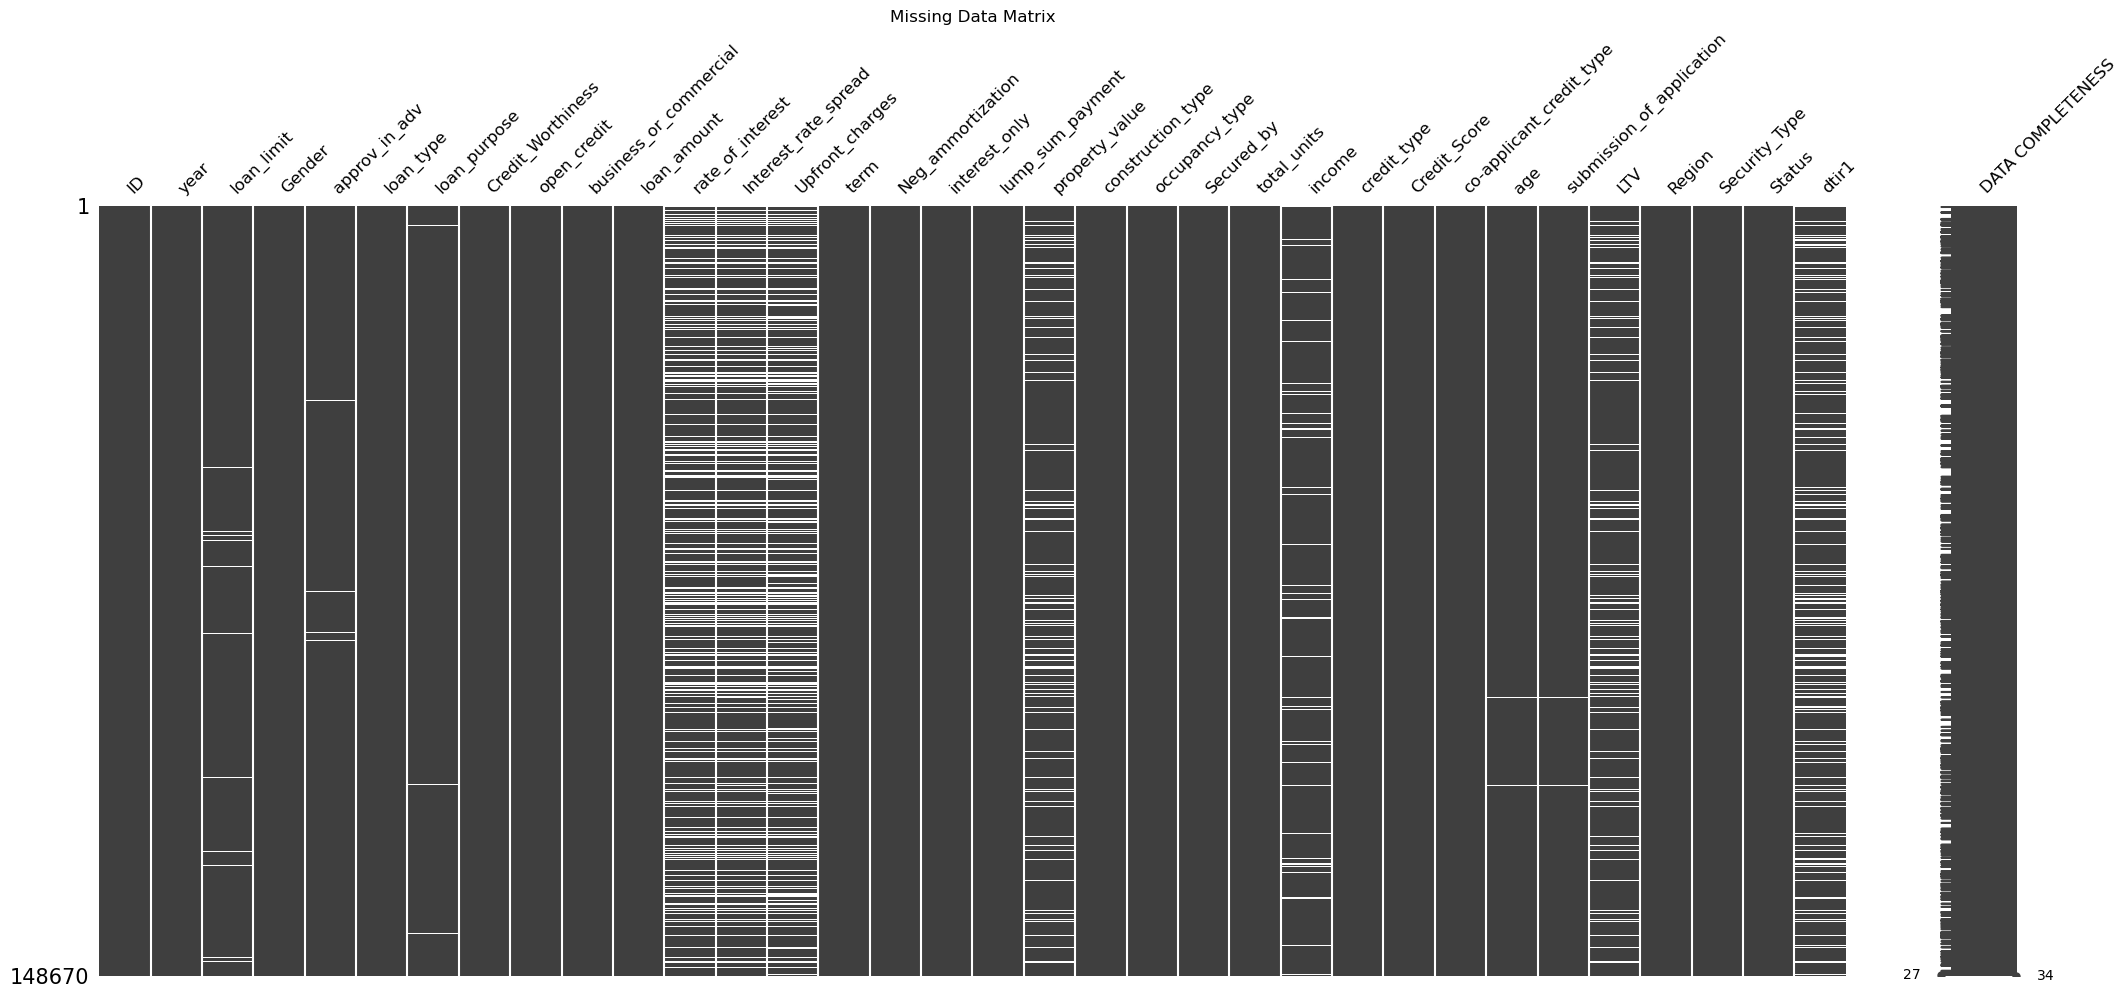

In [5]:
# Visualizing the missing data 
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Cleaning Essentials]
msno.matrix(default_data, fontsize = 12, labels = True)
plt.title("Missing Data Matrix")
#plt.xlabel(col_names)
plt.show()

In [6]:
col_names = default_data.columns.tolist()

In [7]:
quant_cols = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1']
qual_cols = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
misc = ['ID', 'year','term', 'Status']
missing_values_quant = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges','property_value', 'income', 'LTV', 'dtir1']
missing_values_qual = ['loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization', 'age', 'submission_of_application']

In [8]:
len(quant_cols) + len(qual_cols) + len(misc) == len(col_names)

True

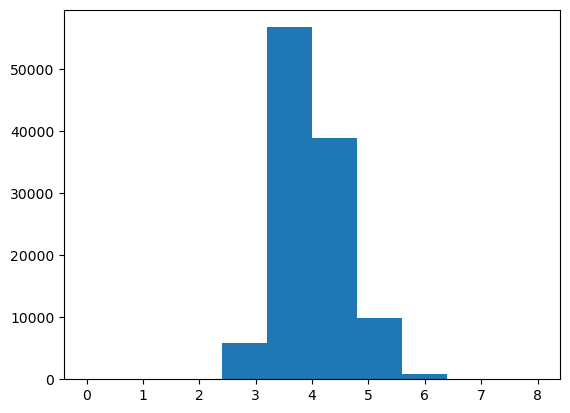

count    112231.000000
mean          4.045476
std           0.561391
min           0.000000
25%           3.625000
50%           3.990000
75%           4.375000
max           8.000000
Name: rate_of_interest, dtype: float64
Median:  3.99


In [9]:
# Checking histogram for loan_amount
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(default_data["rate_of_interest"])
plt.show()

# Check the statistics of the data before editing
print(default_data["rate_of_interest"].describe())
print("Median: ", default_data["rate_of_interest"].median())

In [10]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
# I will impute the mean for the missing values in this case, so as to maintain some of the data. 
default_data["rate_of_interest"].fillna(default_data["rate_of_interest"].mean(), inplace = True)

# Check the statistics of the data after editing
print(default_data["rate_of_interest"].describe())
print("Median: ", default_data["rate_of_interest"].mean())

print(default_data.isna().sum())

count    148670.000000
mean          4.045476
std           0.487764
min           0.000000
25%           3.750000
50%           4.045476
75%           4.250000
max           8.000000
Name: rate_of_interest, dtype: float64
Median:  4.0454758043677765
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by    

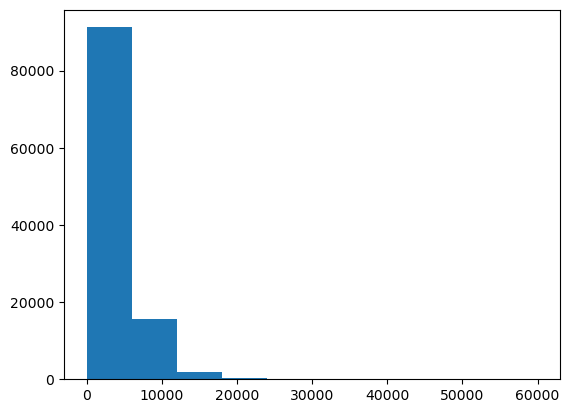

count    109028.000000
mean       3224.996127
std        3251.121510
min           0.000000
25%         581.490000
50%        2596.450000
75%        4812.500000
max       60000.000000
Name: Upfront_charges, dtype: float64
Median:  2596.45


In [11]:
# Checking histogram for loan_amount
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(default_data["Upfront_charges"])
plt.show()

# Check the statistics of the data before editing
print(default_data["Upfront_charges"].describe())
print("Median: ", default_data["Upfront_charges"].median())

In [12]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
# I will impute the mean for the missing values in this case, so as to maintain some of the data. 
default_data["Upfront_charges"].fillna(default_data["Upfront_charges"].median(), inplace = True)

# Check the statistics of the data after editing
print(default_data["Upfront_charges"].describe())
print("Median: ", default_data["Upfront_charges"].median())

print(default_data.isna().sum())

count    148670.000000
mean       3057.397919
std        2797.972965
min           0.000000
25%        1250.000000
50%        2596.450000
75%        3889.495000
max       60000.000000
Name: Upfront_charges, dtype: float64
Median:  2596.45
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread         36639
Upfront_charges                  0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                

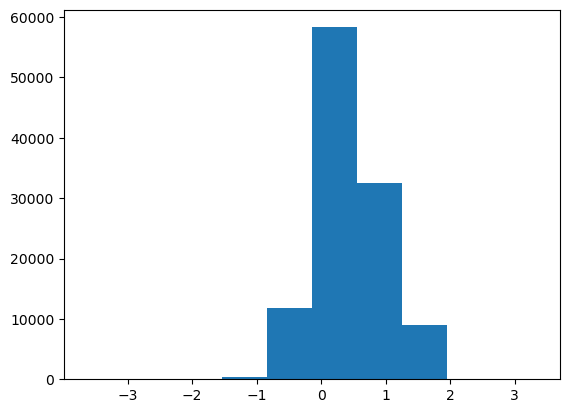

count    112031.000000
mean          0.441656
std           0.513043
min          -3.638000
25%           0.076000
50%           0.390400
75%           0.775400
max           3.357000
Name: Interest_rate_spread, dtype: float64
Median:  0.3904


In [13]:
# Checking histogram for loan_amount
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(default_data["Interest_rate_spread"])
plt.show()

# Check the statistics of the data before editing
print(default_data["Interest_rate_spread"].describe())
print("Median: ", default_data["Interest_rate_spread"].median())

In [14]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
# I will impute the mean for the missing values in this case, so as to maintain some of the data. 
default_data["Interest_rate_spread"].fillna(default_data["Interest_rate_spread"].mean(), inplace = True)

# Check the statistics of the data after editing
print(default_data["Interest_rate_spread"].describe())
print("Median: ", default_data["Interest_rate_spread"].mean())

print(default_data.isna().sum())

count    148670.000000
mean          0.441656
std           0.445359
min          -3.638000
25%           0.181500
50%           0.441656
75%           0.620000
max           3.357000
Name: Interest_rate_spread, dtype: float64
Median:  0.44165566048682947
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread             0
Upfront_charges                  0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_b

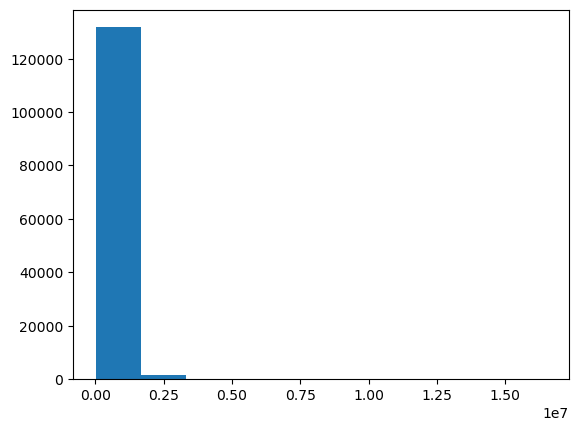

count    1.335720e+05
mean     4.978935e+05
std      3.599353e+05
min      8.000000e+03
25%      2.680000e+05
50%      4.180000e+05
75%      6.280000e+05
max      1.650800e+07
Name: property_value, dtype: float64
Median:  418000.0


In [15]:
# Checking histogram for loan_amount
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(default_data["property_value"])
plt.show()

# Check the statistics of the data before editing
print(default_data["property_value"].describe())
print("Median: ", default_data["property_value"].median())

In [16]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
# I will impute the mean for the missing values in this case, so as to maintain some of the data. 
default_data["property_value"].fillna(default_data["property_value"].median(), inplace = True)

# Check the statistics of the data after editing
print(default_data["property_value"].describe())
print("Median: ", default_data["property_value"].median())

print(default_data.isna().sum())

count    1.486700e+05
mean     4.897800e+05
std      3.420221e+05
min      8.000000e+03
25%      2.880000e+05
50%      4.180000e+05
75%      5.980000e+05
max      1.650800e+07
Name: property_value, dtype: float64
Median:  418000.0
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread             0
Upfront_charges                  0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value                   0
construction_type                0
occupancy_type                   0
Secured_by                       0

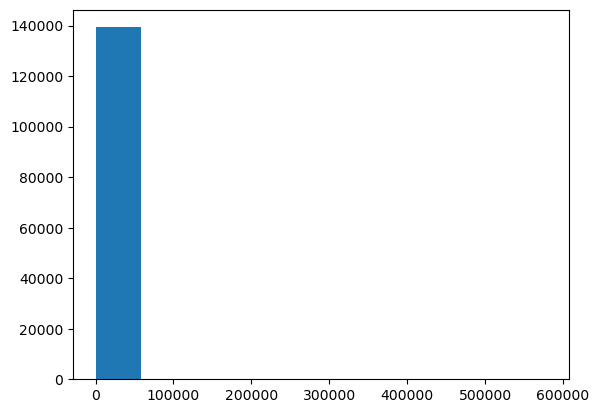

count    139520.000000
mean       6957.338876
std        6496.586382
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64
Median:  5760.0


In [17]:
# Checking histogram for loan_amount
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(default_data["income"])
plt.show()

# Check the statistics of the data before editing
print(default_data["income"].describe())
print("Median: ", default_data["income"].median())

In [18]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
# I will impute the median for the missing values in this case, so as to maintain some of the data. 
default_data["income"].fillna(default_data["income"].median(), inplace = True)

# Check the statistics of the data after editing
print(default_data["income"].describe())
print("Median: ", default_data["income"].median())

print(default_data.isna().sum())

count    148670.000000
mean       6883.647811
std        6300.067060
min           0.000000
25%        3840.000000
50%        5760.000000
75%        8280.000000
max      578580.000000
Name: income, dtype: float64
Median:  5760.0
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread             0
Upfront_charges                  0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value                   0
construction_type                0
occupancy_type                   0
Secured_by                       0
t

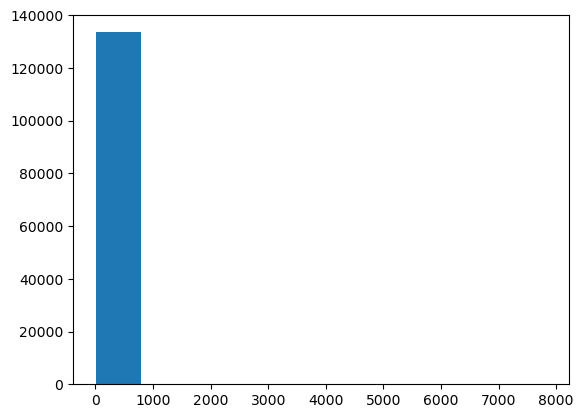

count    133572.000000
mean         72.746457
std          39.967603
min           0.967478
25%          60.474860
50%          75.135870
75%          86.184211
max        7831.250000
Name: LTV, dtype: float64
Median:  75.13586957


In [19]:
# Checking histogram for LTV
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(default_data["LTV"])
plt.show()

# Check the statistics of the data before editing
print(default_data["LTV"].describe())
print("Median: ", default_data["LTV"].median())

In [20]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
# I will impute the median for the missing values in this case, so as to maintain some of the data. 
default_data["LTV"].fillna(default_data["loan_amount"]/default_data["property_value"], inplace = True)

# Check the statistics of the data after editing
print(default_data["LTV"].describe())
print("Median: ", default_data["LTV"].median())

print(default_data.isna().sum())

count    148670.000000
mean         65.438928
std          43.676559
min           0.039474
25%          54.584352
50%          73.026316
75%          84.722222
max        7831.250000
Name: LTV, dtype: float64
Median:  73.02631579
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest                 0
Interest_rate_spread             0
Upfront_charges                  0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value                   0
construction_type                0
occupancy_type                   0
Secured_by                       0

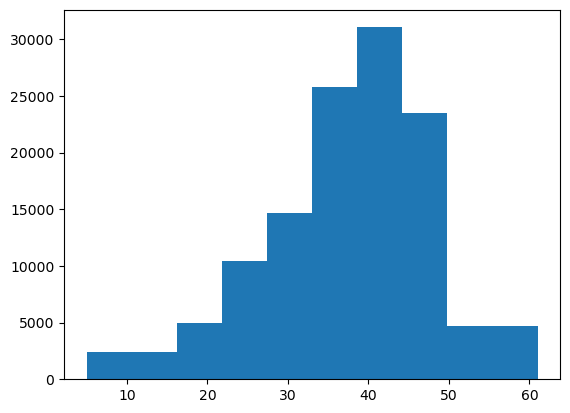

count    124549.000000
mean         37.732932
std          10.545435
min           5.000000
25%          31.000000
50%          39.000000
75%          45.000000
max          61.000000
Name: dtir1, dtype: float64
Median:  39.0


In [21]:
# Checking histogram for LTV
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
plt.hist(default_data["dtir1"])
plt.show()

# Check the statistics of the data before editing
print(default_data["dtir1"].describe())
print("Median: ", default_data["dtir1"].median())

In [22]:
# [In text citation: Dr. Middleton, K (n.d) Getting Started with D206 Data Types, Distributions, and Univariate Imputation]
# I will impute the median for the missing values in this case, so as to maintain some of the data. 
default_data["dtir1"].fillna(default_data["dtir1"].median(), inplace = True)

# Check the statistics of the data after editing
print(default_data["dtir1"].describe())
print("Median: ", default_data["dtir1"].median())

print(default_data.isna().sum())

count    148670.000000
mean         37.938508
std           9.663417
min           5.000000
25%          33.000000
50%          39.000000
75%          44.000000
max          61.000000
Name: dtir1, dtype: float64
Median:  39.0
ID                              0
year                            0
loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                           41
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units               

In [23]:
## To investigate how to fix the remaining missing values, I will look closely at their makeup
default_data['loan_limit'].nunique()
default_data['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

NA Value Count:  0
cf     138692
ncf      9978
Name: loan_limit, dtype: int64


<Axes: >

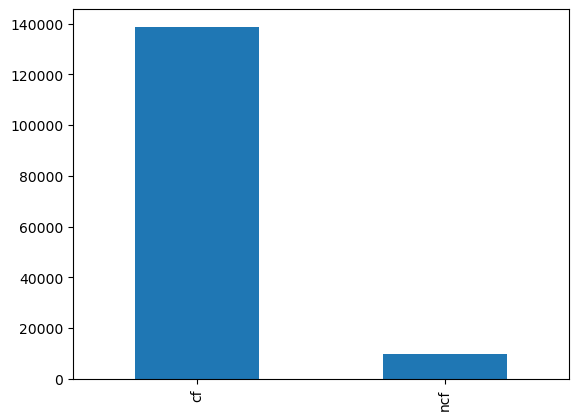

In [24]:
## Since the data is so heavily skewed towards "cf", I will impute the mode to the missing data
default_data['loan_limit'].fillna(default_data['loan_limit'].mode()[0], inplace = True)

print("NA Value Count: ", default_data['loan_limit'].isna().sum())
print(default_data['loan_limit'].value_counts())

default_data['loan_limit'].value_counts().plot(kind = 'bar')

NA Value Count:  0
nopre    125529
pre       23141
Name: approv_in_adv, dtype: int64


<Axes: >

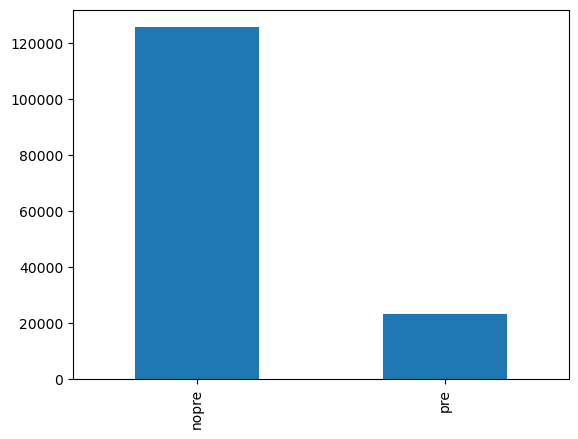

In [25]:
## Since the data is so heavily skewed towards "cf", I will impute the mode to the missing data
default_data['approv_in_adv'].fillna(default_data['approv_in_adv'].mode()[0], inplace = True)

print("NA Value Count: ", default_data['approv_in_adv'].isna().sum())
print(default_data['approv_in_adv'].value_counts())

default_data['approv_in_adv'].value_counts().plot(kind = 'bar')

In [26]:
## To investigate how to fix the remaining missing values, I will look closely at their makeup
default_data['loan_purpose'].nunique()
default_data['loan_purpose'].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

NA Value Count:  0
p3    56068
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64


<Axes: >

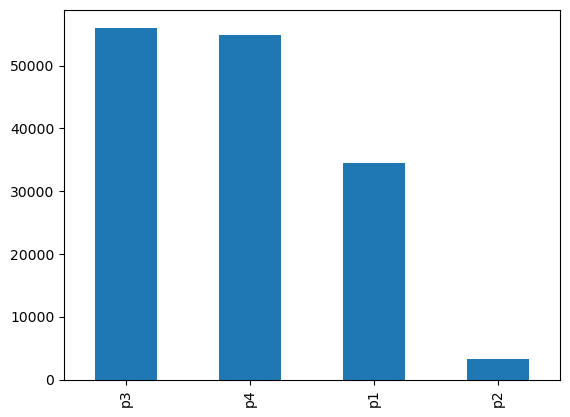

In [27]:
## Since the data is so heavily skewed towards "cf", I will impute the mode to the missing data
default_data['loan_purpose'].fillna(default_data['loan_purpose'].mode()[0], inplace = True)

print("NA Value Count: ", default_data['loan_purpose'].isna().sum())
print(default_data['loan_purpose'].value_counts())

default_data['loan_purpose'].value_counts().plot(kind = 'bar')

In [28]:
print(default_data.isna().sum())

ID                             0
year                           0
loan_limit                     0
Gender                         0
approv_in_adv                  0
loan_type                      0
loan_purpose                   0
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
Interest_rate_spread           0
Upfront_charges                0
term                          41
Neg_ammortization            121
interest_only                  0
lump_sum_payment               0
property_value                 0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
income                         0
credit_type                    0
Credit_Score                   0
co-applicant_credit_type       0
age                          200
submission_of_application    200
LTV                            0
Region    

In [29]:
## To investigate how to fix the remaining missing values, I will look closely at their makeup
default_data['Neg_ammortization'].nunique()
default_data['Neg_ammortization'].value_counts()

not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64

NA Value Count:  0
not_neg    133541
neg_amm     15129
Name: Neg_ammortization, dtype: int64


<Axes: >

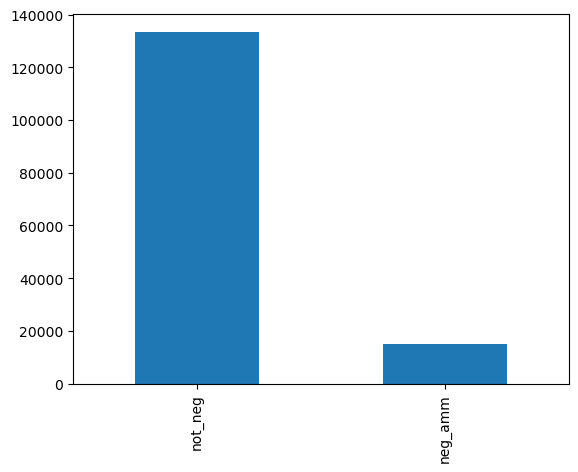

In [30]:
## Since the data is so heavily skewed towards "cf", I will impute the mode to the missing data
default_data['Neg_ammortization'].fillna(default_data['Neg_ammortization'].mode()[0], inplace = True)

print("NA Value Count: ", default_data['Neg_ammortization'].isna().sum())
print(default_data['Neg_ammortization'].value_counts())

default_data['Neg_ammortization'].value_counts().plot(kind = 'bar')

In [31]:
## To investigate how to fix the remaining missing values, I will look closely at their makeup
default_data['age'].nunique()
default_data['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

NA Value Count:  0
45-54    34920
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64


<Axes: >

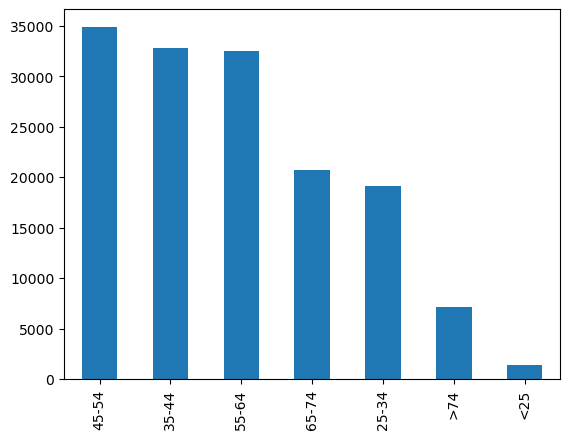

In [32]:
## Since the data is so heavily skewed towards "cf", I will impute the mode to the missing data
default_data['age'].fillna(default_data['age'].mode()[0], inplace = True)

print("NA Value Count: ", default_data['age'].isna().sum())
print(default_data['age'].value_counts())

default_data['age'].value_counts().plot(kind = 'bar')

In [33]:
## To investigate how to fix the remaining missing values, I will look closely at their makeup
default_data['submission_of_application'].nunique()
default_data['submission_of_application'].value_counts()

to_inst     95814
not_inst    52656
Name: submission_of_application, dtype: int64

NA Value Count:  0
to_inst     96014
not_inst    52656
Name: submission_of_application, dtype: int64


<Axes: >

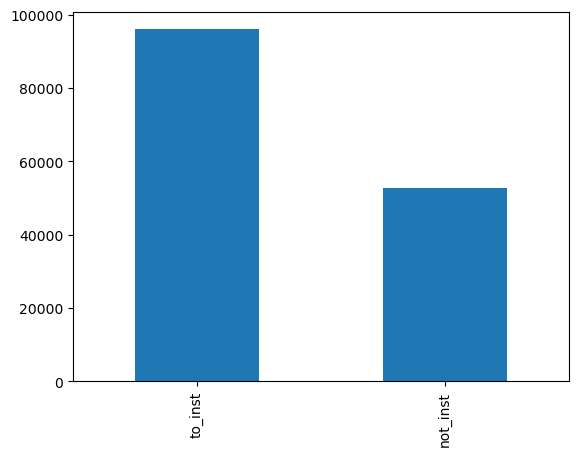

In [34]:
## Since the data is so heavily skewed towards "cf", I will impute the mode to the missing data
default_data['submission_of_application'].fillna(default_data['submission_of_application'].mode()[0], inplace = True)

print("NA Value Count: ", default_data['submission_of_application'].isna().sum())
print(default_data['submission_of_application'].value_counts())

default_data['submission_of_application'].value_counts().plot(kind = 'bar')

In [35]:
print(default_data.isna().sum())

ID                            0
year                          0
loan_limit                    0
Gender                        0
approv_in_adv                 0
loan_type                     0
loan_purpose                  0
Credit_Worthiness             0
open_credit                   0
business_or_commercial        0
loan_amount                   0
rate_of_interest              0
Interest_rate_spread          0
Upfront_charges               0
term                         41
Neg_ammortization             0
interest_only                 0
lump_sum_payment              0
property_value                0
construction_type             0
occupancy_type                0
Secured_by                    0
total_units                   0
income                        0
credit_type                   0
Credit_Score                  0
co-applicant_credit_type      0
age                           0
submission_of_application     0
LTV                           0
Region                        0
Security

In [36]:
## To investigate how to fix the remaining missing values, I will look closely at their makeup
default_data['term'].nunique()
default_data['term'].value_counts()

360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: term, dtype: int64

NA Value Count:  0
360.0    121726
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: term, dtype: int64


<Axes: >

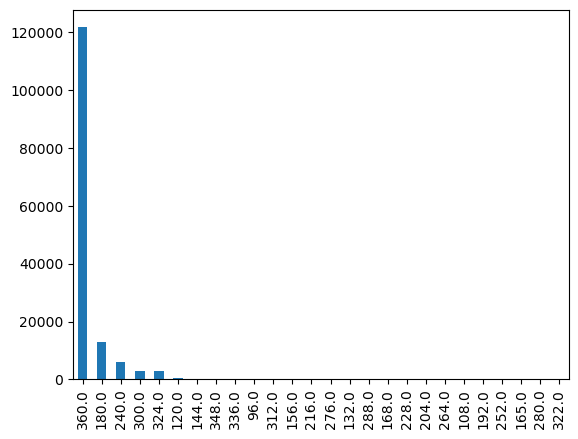

In [37]:
## Since the data is so heavily skewed towards "cf", I will impute the mode to the missing data
default_data['term'].fillna(default_data['term'].mode()[0], inplace = True)

print("NA Value Count: ", default_data['term'].isna().sum())
print(default_data['term'].value_counts())

default_data['term'].value_counts().plot(kind = 'bar')

In [38]:
print(default_data.isna().sum())

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [39]:
## Checking all the quantitative variables for outliers to decide if I need to edit them.

Outliers on the high side:  1895
Outliers on the low side:  0


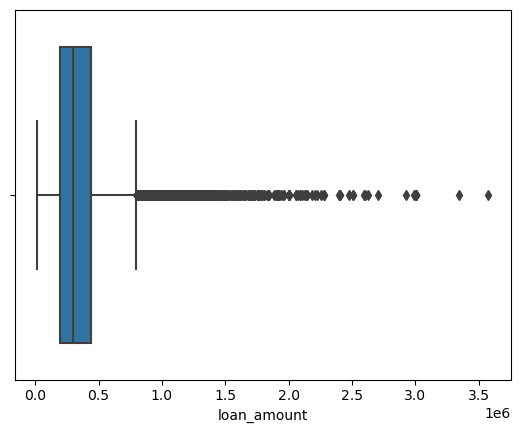

In [40]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['loan_amount'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["loan_amount"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["loan_amount"] < whisker_left].count()[0])
boxplot_loan_amount = seaborn.boxplot(x = 'loan_amount', data = default_data)

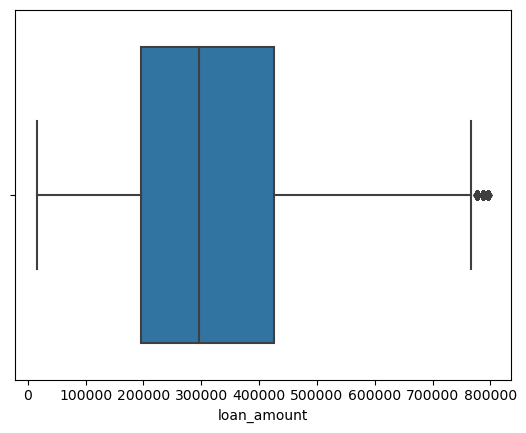

In [41]:
loan_amount_outliers = default_data[ (default_data["loan_amount"] > whisker_right)]

default_data.drop(default_data[ (default_data["loan_amount"] > whisker_right)].index, inplace = True )
loan_amount_removed_outliers = seaborn.boxplot(x = "loan_amount", data = default_data)

In [42]:
## To maintain data quality, I will retain the rest of these outliers.

Outliers on the high side:  3635
Outliers on the low side:  3092


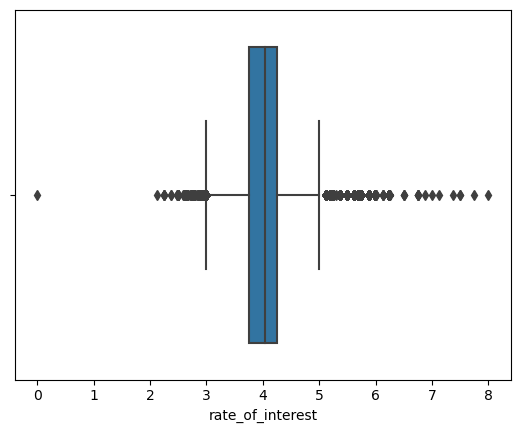

In [43]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['rate_of_interest'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["rate_of_interest"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["rate_of_interest"] < whisker_left].count()[0])
boxplot_Interest_rate_spread = seaborn.boxplot(x = 'rate_of_interest', data = default_data)


In [44]:
## Choosing to retain the outliers as the rate of interest should be set by the company and thus shouldn't have huge outliers

Outliers on the high side:  8173
Outliers on the low side:  2916


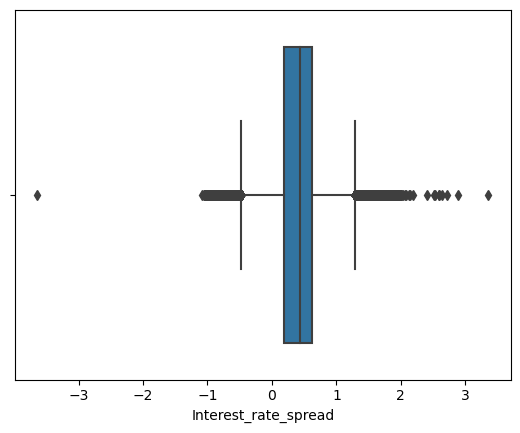

In [45]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['Interest_rate_spread'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["Interest_rate_spread"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["Interest_rate_spread"] < whisker_left].count()[0])
boxplot_Interest_rate_spread = seaborn.boxplot(x = 'Interest_rate_spread', data = default_data)


In [46]:
## Choosing to retain the outliers as the interest rate spread should be set by the company and thus shouldn't have huge outliers

Outliers on the high side:  8613
Outliers on the low side:  0


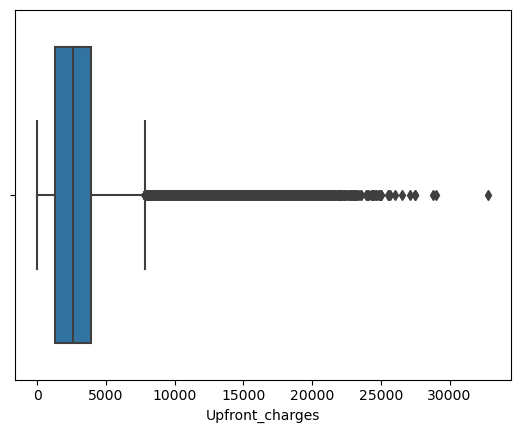

In [47]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['Upfront_charges'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["Upfront_charges"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["Upfront_charges"] < whisker_left].count()[0])
boxplot_Upfront_charges = seaborn.boxplot(x = 'Upfront_charges', data = default_data)

In [48]:
print("Outliers on the high side: ", default_data[default_data["Upfront_charges"] > 35000].count()[0])

Outliers on the high side:  0


In [49]:
## Removing the most egregious outliers

In [50]:
Upfront_charges_outliers = default_data[ (default_data["Upfront_charges"] > 35000)]
default_data.drop(default_data[ (default_data["Upfront_charges"] > 35000)].index, inplace = True )

In [51]:
default_data['Status'].value_counts()

0    110985
1     35790
Name: Status, dtype: int64

Outliers on the high side:  8613
Outliers on the low side:  0


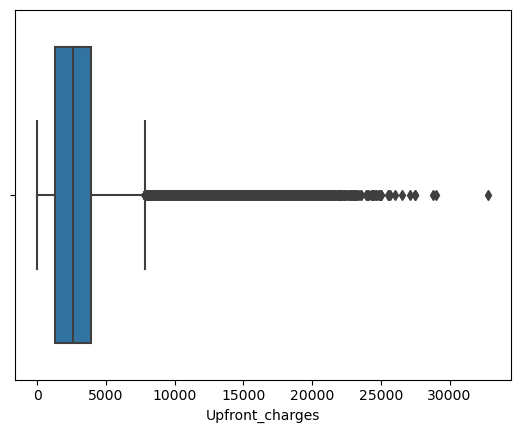

In [52]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['Upfront_charges'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["Upfront_charges"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["Upfront_charges"] < whisker_left].count()[0])
boxplot_Upfront_charges = seaborn.boxplot(x = 'Upfront_charges', data = default_data)

In [53]:
## Keeping the rest of the outliers

Outliers on the high side:  5443
Outliers on the low side:  0


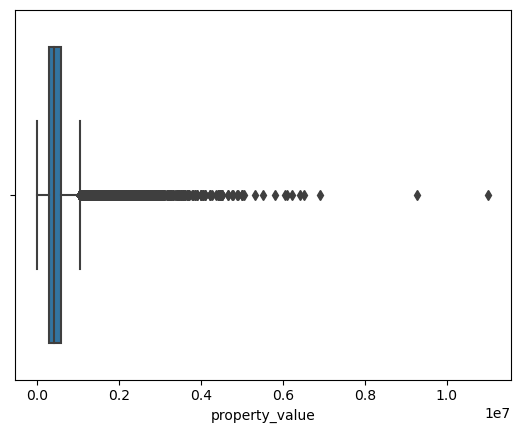

In [54]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['property_value'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["property_value"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["property_value"] < whisker_left].count()[0])
boxplot_property_value = seaborn.boxplot(x = 'property_value', data = default_data)

In [55]:
## Removing all outliers listed, as they make up a small amount of data and aren't typical customers

In [56]:
property_value_outliers = default_data[ (default_data["property_value"] > whisker_right)]
default_data.drop(default_data[ (default_data["property_value"] > whisker_right)].index, inplace = True )

In [57]:
default_data['Status'].value_counts()

0    106253
1     35079
Name: Status, dtype: int64

Outliers on the high side:  1823
Outliers on the low side:  0


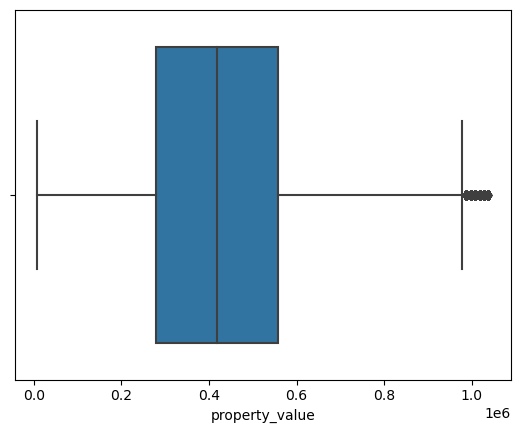

In [58]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['property_value'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["property_value"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["property_value"] < whisker_left].count()[0])
boxplot_property_value = seaborn.boxplot(x = 'property_value', data = default_data)

In [59]:
## Retaining the rest

Outliers on the high side:  6559
Outliers on the low side:  0


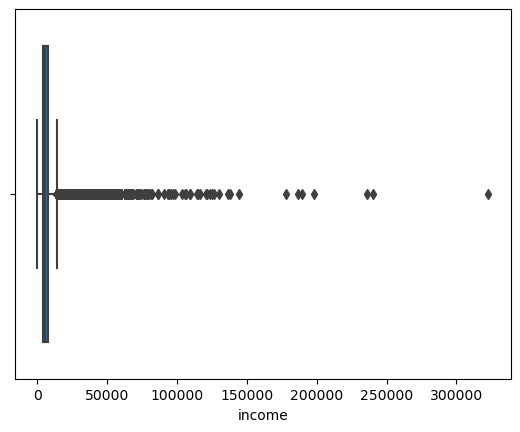

In [60]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['income'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["income"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["income"] < whisker_left].count()[0])
boxplot_rate_of_interest = seaborn.boxplot(x = 'income', data = default_data)

In [61]:
income_outliers = default_data[ (default_data["income"] > 100000)]
default_data.drop(default_data[ (default_data["income"] > 100000)].index, inplace = True )

In [62]:
default_data['Status'].value_counts()

0    106239
1     35069
Name: Status, dtype: int64

Outliers on the high side:  6535
Outliers on the low side:  0


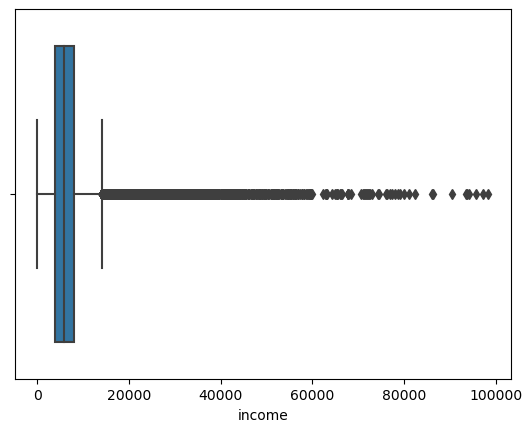

In [63]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['income'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["income"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["income"] < whisker_left].count()[0])
boxplot_income = seaborn.boxplot(x = 'income', data = default_data)

In [64]:
## Retaining the rest. Income is highly skewed towards low income but I think some moderate to high incomes should be included

Outliers on the high side:  0
Outliers on the low side:  0


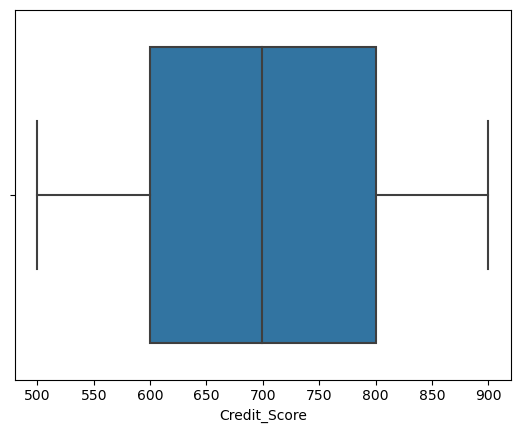

In [65]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['Credit_Score'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["Credit_Score"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["Credit_Score"] < whisker_left].count()[0])
boxplot_rate_of_interest = seaborn.boxplot(x = 'Credit_Score', data = default_data)

Outliers on the high side:  103
Outliers on the low side:  15017


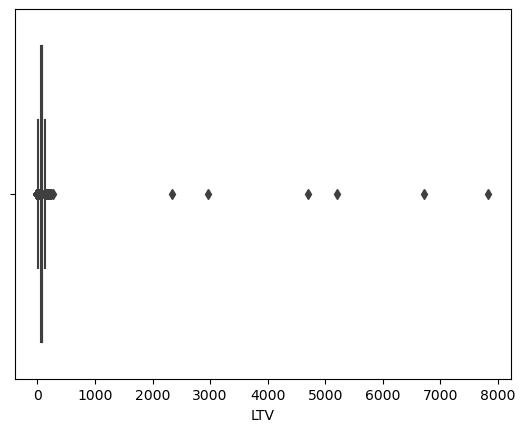

In [66]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['LTV'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["LTV"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["LTV"] < whisker_left].count()[0])
boxplot_rate_of_interest = seaborn.boxplot(x = 'LTV', data = default_data)

In [67]:
## This is an equation from other variables, so I will retain outliers in here

Outliers on the high side:  1474
Outliers on the low side:  5095


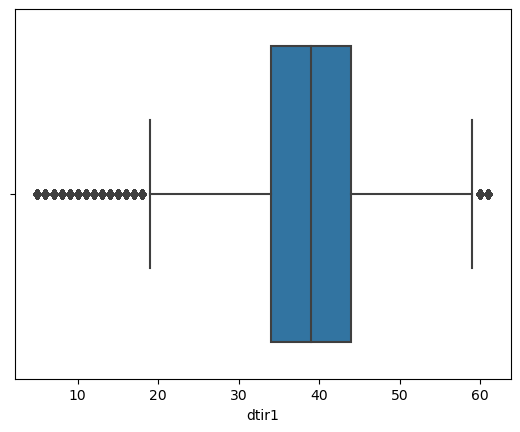

In [68]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['dtir1'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["dtir1"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["dtir1"] < whisker_left].count()[0])
boxplot_rate_of_interest = seaborn.boxplot(x = 'dtir1', data = default_data)

In [69]:
dtir1_outliers = default_data[ (default_data["dtir1"] < whisker_left)]
default_data.drop(default_data[ (default_data["dtir1"] < whisker_left)].index, inplace = True )

In [70]:
default_data['Status'].value_counts()

0    102549
1     33664
Name: Status, dtype: int64

Outliers on the high side:  2986
Outliers on the low side:  3890


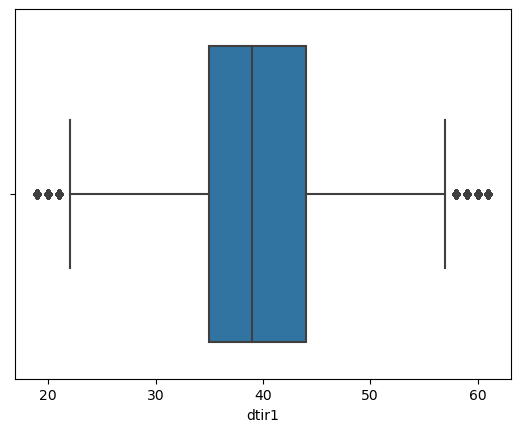

In [71]:
count, mean, std, minim, first_q, second_q, third_q, maxim = default_data['dtir1'].describe()
iqr = (third_q - first_q) * 1.5
whisker_left = first_q - iqr
whisker_right = third_q + iqr
print("Outliers on the high side: ", default_data[default_data["dtir1"] > whisker_right].count()[0])
print("Outliers on the low side: ", default_data[default_data["dtir1"] < whisker_left].count()[0])
boxplot_rate_of_interest = seaborn.boxplot(x = 'dtir1', data = default_data)

In [72]:
default_data.shape

(136213, 34)

In [73]:
## I'm going to create a new dataframe that has just the information and columns that i will use for my analysis.
## I will remove any information not integral to the analysis. Term is included as there are so many terms the analysis
## Becomes much too complicated to view.

default_data_RF = default_data.drop(columns = ['ID', 'year', 'term'])

In [74]:
default_data_RF = default_data_RF.reset_index()

In [75]:
col_names_RF = default_data_RF.columns.tolist()

In [76]:
for i in range(0, len(qual_cols)):
    print(qual_cols[i], ":", type(default_data_RF[qual_cols[i]][0]))

loan_limit : <class 'str'>
Gender : <class 'str'>
approv_in_adv : <class 'str'>
loan_type : <class 'str'>
loan_purpose : <class 'str'>
Credit_Worthiness : <class 'str'>
open_credit : <class 'str'>
business_or_commercial : <class 'str'>
Neg_ammortization : <class 'str'>
interest_only : <class 'str'>
lump_sum_payment : <class 'str'>
construction_type : <class 'str'>
occupancy_type : <class 'str'>
Secured_by : <class 'str'>
total_units : <class 'str'>
credit_type : <class 'str'>
co-applicant_credit_type : <class 'str'>
age : <class 'str'>
submission_of_application : <class 'str'>
Region : <class 'str'>
Security_Type : <class 'str'>


In [77]:
single_qual = []
binary_qual = []
multi_qual = []

for i in range(0, len(qual_cols)):
    if default_data[qual_cols[i]].nunique() == 1:
        single_qual.append(qual_cols[i])
    elif default_data[qual_cols[i]].nunique() == 2:
        binary_qual.append(qual_cols[i])
    elif default_data[qual_cols[i]].nunique() > 2:
        multi_qual.append(qual_cols[i])

print("1 unique value columns: ", single_qual)
print("2 unique value columns: ", binary_qual)
print("Multiple unique value columns: ", multi_qual)

len(single_qual) + len(binary_qual) + len(multi_qual) == len(qual_cols)

1 unique value columns:  []
2 unique value columns:  ['loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'Secured_by', 'co-applicant_credit_type', 'submission_of_application', 'Security_Type']
Multiple unique value columns:  ['Gender', 'loan_type', 'loan_purpose', 'occupancy_type', 'total_units', 'credit_type', 'age', 'Region']


True

In [78]:
## Editing the binary qualitative variables to 1s and 0s respectively. 1s being the more common value and 0s being the less common

In [79]:
for i in range(0, len(binary_qual)):
    default_data_RF[binary_qual[i]] = default_data_RF[binary_qual[i]].replace({default_data_RF[binary_qual[i]].value_counts().index[0]: 1, default_data_RF[binary_qual[i]].value_counts().index[1]: 0})

In [80]:
default_data_RF.head()

,index,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,1,Sex Not Available,1,type1,p1,1,1,1,116500,...,EXP,758,1,25-34,1,98.728814,south,1,1,45.0
1,1,1,Male,1,type2,p1,1,1,0,206500,...,EQUI,552,0,55-64,1,0.494019,North,1,1,39.0
2,2,1,Male,0,type1,p1,1,1,1,406500,...,EXP,834,1,35-44,1,80.019685,south,1,0,46.0
3,3,1,Male,1,type1,p4,1,1,1,456500,...,EXP,587,1,45-54,0,69.376900,North,1,0,42.0
4,4,1,Joint,0,type1,p1,1,1,1,696500,...,CRIF,602,0,25-34,0,91.886544,North,1,0,39.0


In [81]:
for i in range(0, len(multi_qual)):
    print(multi_qual[i], "unique values: ", len(default_data_RF[multi_qual[i]].unique()))

Gender unique values:  4
loan_type unique values:  3
loan_purpose unique values:  4
occupancy_type unique values:  3
total_units unique values:  4
credit_type unique values:  4
age unique values:  7
Region unique values:  4


In [82]:
## Dr. Elleh video lecture 'D209 T1 Building KNN in Python Med'
for i in range(0, len(multi_qual)):
    if len(default_data_RF[multi_qual[i]].unique()) == 3:
        a, b, c = default_data_RF[multi_qual[i]].unique()
        default_data_RF[multi_qual[i]] = default_data_RF[multi_qual[i]].str.replace(' ', '')
        encoded = pd.get_dummies(default_data_RF[multi_qual[i]], prefix = multi_qual[i])
        frames = [default_data_RF, encoded]
        default_data_RF = pd.concat(frames, axis = 1)
        default_data_RF = default_data_RF.drop([multi_qual[i]], axis = 1)
    elif len(default_data_RF[multi_qual[i]].unique()) == 4:
        a, b, c, d = default_data_RF[multi_qual[i]].unique()
        default_data_RF[multi_qual[i]] = default_data_RF[multi_qual[i]].str.replace(' ', '')
        encoded = pd.get_dummies(default_data_RF[multi_qual[i]], prefix = multi_qual[i])
        frames = [default_data_RF, encoded]
        default_data_RF = pd.concat(frames, axis = 1)
        default_data_RF = default_data_RF.drop([multi_qual[i]], axis = 1)
    elif len(default_data_RF[multi_qual[i]].unique()) == 7:
        a, b, c, d, e, f, g = default_data_RF[multi_qual[i]].unique()
        default_data_RF[multi_qual[i]] = default_data_RF[multi_qual[i]].str.replace(' ', '')
        encoded = pd.get_dummies(default_data_RF[multi_qual[i]], prefix = multi_qual[i])
        frames = [default_data_RF, encoded]
        default_data_RF = pd.concat(frames, axis = 1)
        default_data_RF = default_data_RF.drop([multi_qual[i]], axis = 1)
default_data_RF.head()

,index,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,0,1,1,1,1,1,116500,4.045476,0.441656,2596.45,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,0,206500,4.045476,0.441656,2596.45,...,0,0,1,0,0,0,1,0,0,0
2,2,1,0,1,1,1,406500,4.560000,0.200000,595.00,...,1,0,0,0,0,0,0,0,0,1
3,3,1,1,1,1,1,456500,4.250000,0.681000,2596.45,...,0,1,0,0,0,0,1,0,0,0
4,4,1,0,1,1,1,696500,4.000000,0.304200,0.00,...,0,0,0,0,0,0,1,0,0,0


In [83]:
default_data_RF['Status'].value_counts()

0    102549
1     33664
Name: Status, dtype: int64

<Axes: >

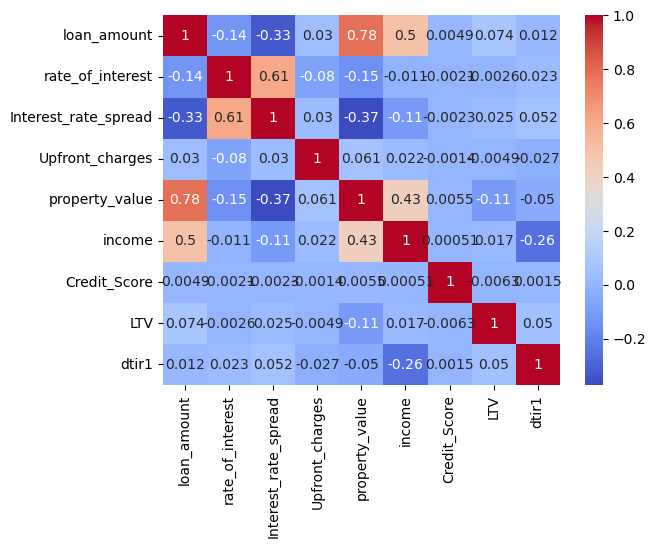

In [84]:
seaborn.heatmap(data = default_data_RF[quant_cols].corr(), annot = True, cmap = 'coolwarm')

In [85]:
## Dropping columns that show correlation. Unfortunately in the data, a majority of the missing values are correlated with 
## Status being set to 1. I am also dropping those columns as the model won't build appropriately otherwise.

<Axes: >

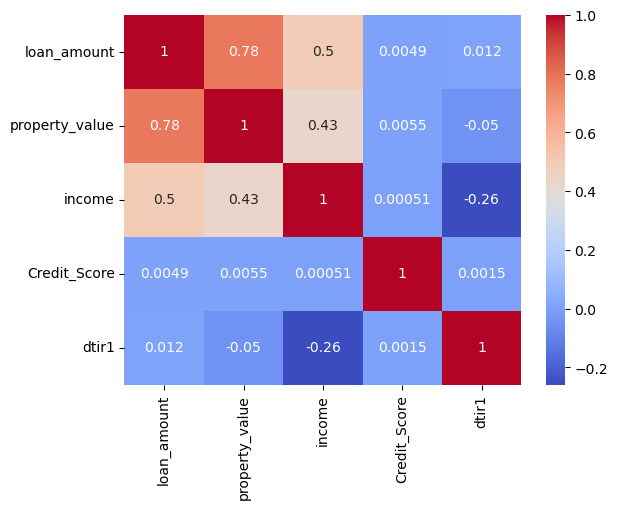

In [86]:
seaborn.heatmap(data = default_data_RF[['loan_amount', 'property_value', 'income', 'Credit_Score', 'dtir1']].corr(), annot = True, cmap = 'coolwarm')

<Axes: >

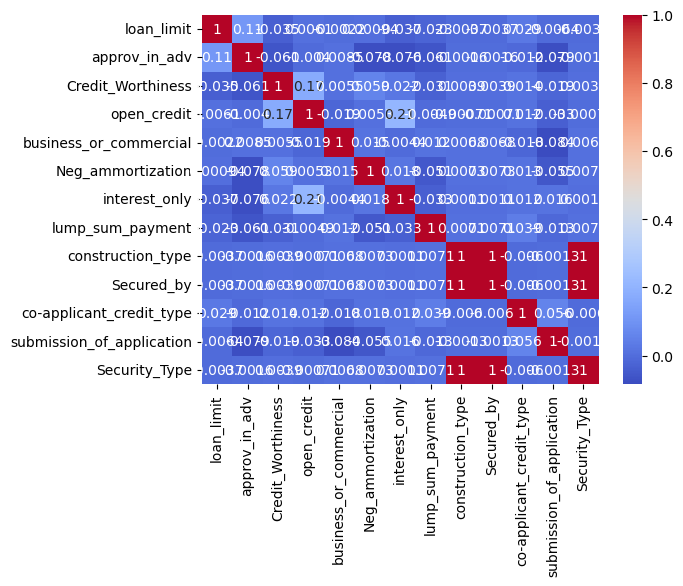

In [87]:
seaborn.heatmap(data = default_data_RF[binary_qual].corr(), annot = True, cmap = 'coolwarm')

In [88]:
default_data_RF_edit = default_data_RF.drop(columns = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'LTV', 'Security_Type', 'Secured_by'])

In [89]:
binary_qual

['loan_limit',
 'approv_in_adv',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'Secured_by',
 'co-applicant_credit_type',
 'submission_of_application',
 'Security_Type']

<Axes: >

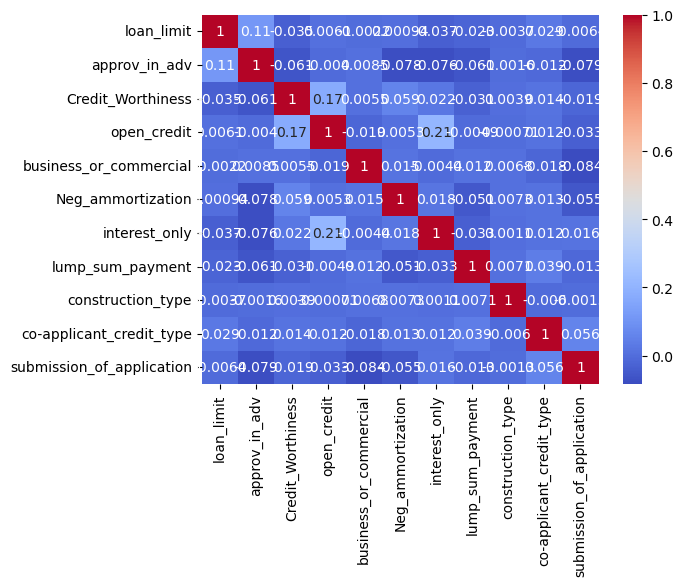

In [90]:
seaborn.heatmap(data = default_data_RF[['loan_limit','approv_in_adv','Credit_Worthiness','open_credit','business_or_commercial','Neg_ammortization','interest_only','lump_sum_payment','construction_type','co-applicant_credit_type','submission_of_application']].corr(), annot = True, cmap = 'coolwarm')

In [91]:
## Dropping security type because of the correlation with the other columns
default_data_RF_final = default_data_RF_edit.drop(columns = ['index'])

In [92]:
default_data_RF_final.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,1,1,1,1,1,1,1,1,118000.0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,0,1,1,0,418000.0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,1,1,0,1,1,508000.0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,658000.0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,0,1,1,1,1,1,1,758000.0,1,...,0,0,0,0,0,0,1,0,0,0


In [93]:
default_data_RF_final.to_csv('C:/Users/cfman/OneDrive/Desktop/WGUClasses/D606Capstone/Datasets/default_data_RF_final.csv', index = False)
#print(default_data_RF.head(5))

In [94]:
default_data_RF_final

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
0,1,1,1,1,1,1,1,1,118000.0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,0,1,1,0,418000.0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,1,1,0,1,1,508000.0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1,1,658000.0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,0,1,1,1,1,1,1,758000.0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136208,1,1,1,1,0,1,1,1,158000.0,1,...,0,0,0,1,0,0,0,0,1,0
136209,1,1,1,1,1,1,1,1,608000.0,1,...,0,0,1,0,0,0,0,0,0,1
136210,1,1,1,1,1,1,1,1,728000.0,1,...,0,1,0,0,0,0,1,0,0,0
136211,1,1,1,1,1,1,1,1,278000.0,1,...,0,0,1,0,0,0,1,0,0,0


In [95]:
explanatory = default_data_RF_final.drop(['Status'], axis = 1)
target = default_data_RF_final['Status']

In [96]:
#explanatory.columns.tolist()

In [97]:
## Creating the training, validation, and test sets

X_train, X_test, y_train, y_test = train_test_split(explanatory, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [98]:
X_train.to_csv('X_train.csv')
X_val.to_csv('X_val.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_val.to_csv('y_val.csv')
y_test.to_csv('y_test.csv')

In [99]:
rfr = RandomForestClassifier()
rfr = rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test.values)

In [110]:
# Built-in feature importance (Gini Importance)
# https://www.geeksforgeeks.org/feature-importance-with-random-forests/
feature_names = X_train.columns
importances = rfr.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                      Feature  Gini Importance
35           credit_type_EQUI         0.194911
8              property_value         0.141226
14                      dtir1         0.129936
10                     income         0.100001
11               Credit_Score         0.094635
33            credit_type_CIB         0.028127
34           credit_type_CRIF         0.025502
12   co-applicant_credit_type         0.024733
36            credit_type_EXP         0.023616
7            lump_sum_payment         0.021217
5           Neg_ammortization         0.018555
1               approv_in_adv         0.010544
13  submission_of_application         0.010094
40                  age_55-64         0.009613
39                  age_45-54         0.009595
19            loan_type_type1         0.009412
25            loan_purpose_p4         0.009324
38                  age_35-44         0.008858
17                Gender_Male         0.008320
2           Credit_Worthiness         0.008258
24           

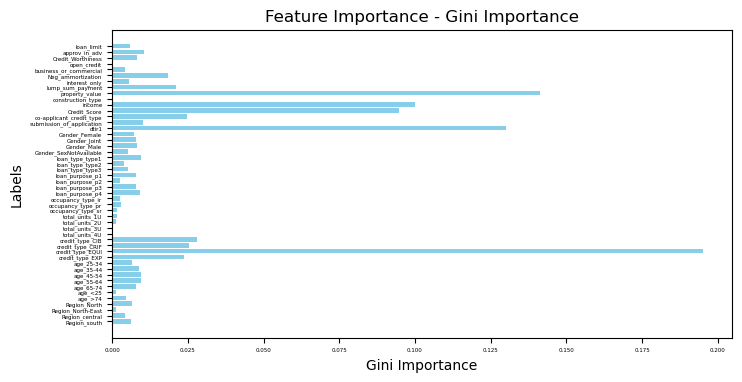

In [126]:
# Create a bar plot for feature importance
# https://www.geeksforgeeks.org/feature-importance-with-random-forests/
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.ylabel('Labels')
plt.tick_params(labelsize = 4)
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

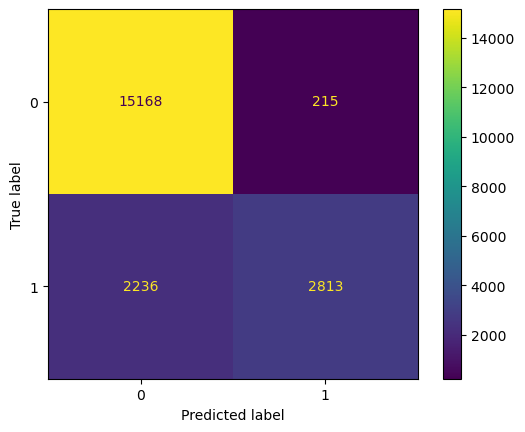

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     15383
           1       0.93      0.56      0.70      5049

    accuracy                           0.88     20432
   macro avg       0.90      0.77      0.81     20432
weighted avg       0.89      0.88      0.87     20432



In [100]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cnf_matrix)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

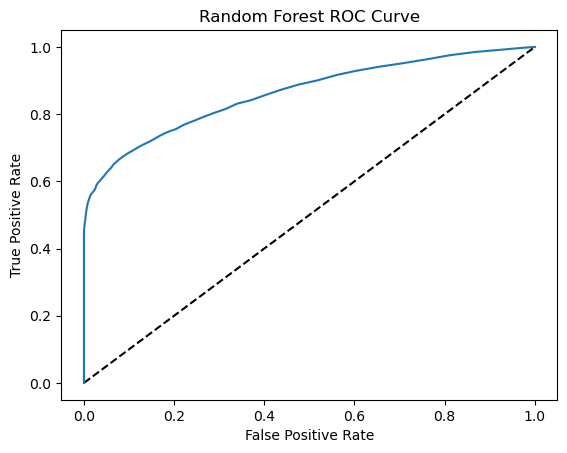

In [101]:
## Initial ROC Curve
probs = rfr.predict_proba(X_test.values)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [102]:
## Initial AUC
auc = roc_auc_score(y_test, probs)
print("AUC: ", auc)

AUC:  0.8619054168839838


In [103]:
## Dr. Elleh's video lecture 'D209 Webinar Splitting Data and Creating Model'
# Determining the best parameters while using the validation dataset
rfr_param = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [10,50,100], 'max_features': [2,3,4], 
              'max_depth' : [8, None]}

# Defining parameter range
grid = GridSearchCV(rfr_param, param_grid, cv = 10)

# Fitting the model for grid search
grid_search = grid.fit(X_val, y_val)

print('The best parameters are: ', grid_search.best_params_)

The best parameters are:  {'max_depth': None, 'max_features': 4, 'n_estimators': 100}


In [104]:
## Using the test data set with the given parameters. Predicting on the validation set.
rfr_update = RandomForestClassifier(max_depth = None, max_features = 4, n_estimators = 100, random_state = 1)
rfr_update = rfr_update.fit(X_test, y_test)
y_pred_update = rfr_update.predict(X_val.values)

In [127]:
# Built-in feature importance (Gini Importance)
feature_names = X_train.columns
importances = rfr_update.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                      Feature  Gini Importance
35           credit_type_EQUI         0.154676
8              property_value         0.148369
14                      dtir1         0.130362
10                     income         0.094982
11               Credit_Score         0.088566
34           credit_type_CRIF         0.032545
33            credit_type_CIB         0.030341
36            credit_type_EXP         0.027132
12   co-applicant_credit_type         0.026403
7            lump_sum_payment         0.022477
5           Neg_ammortization         0.017556
13  submission_of_application         0.013673
1               approv_in_adv         0.011283
24            loan_purpose_p3         0.010919
25            loan_purpose_p4         0.010467
39                  age_45-54         0.010437
17                Gender_Male         0.010395
40                  age_55-64         0.010203
22            loan_purpose_p1         0.009372
16               Gender_Joint         0.009361
38           

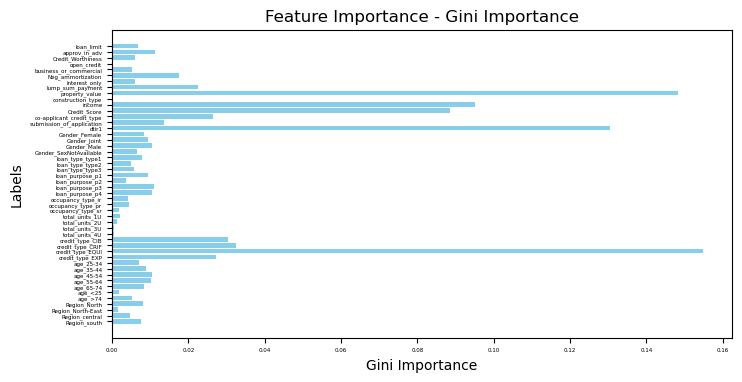

In [128]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.ylabel('Labels')
plt.tick_params(labelsize = 4)
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

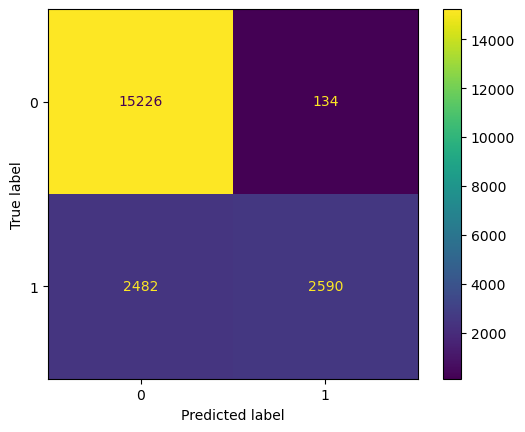

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     15360
           1       0.95      0.51      0.66      5072

    accuracy                           0.87     20432
   macro avg       0.91      0.75      0.79     20432
weighted avg       0.88      0.87      0.86     20432



In [105]:
cnf_matrix_update = metrics.confusion_matrix(y_val, y_pred_update)
disp_update = ConfusionMatrixDisplay(cnf_matrix_update)
disp_update.plot()
plt.show()
print(classification_report(y_val, y_pred_update))

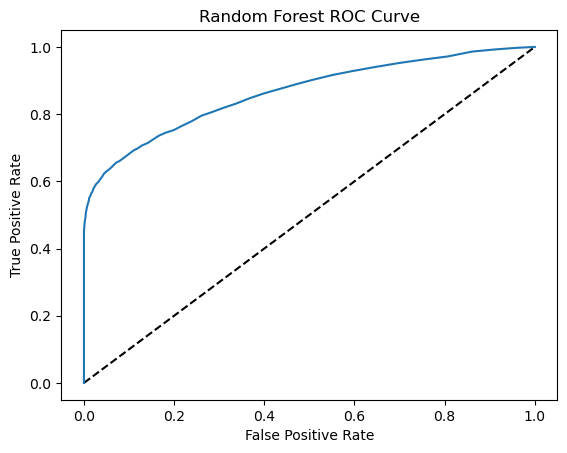

In [106]:
## Updated ROC Curve
probs_update = rfr.predict_proba(X_val.values)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, probs_update)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [107]:
## Initial AUC
auc = roc_auc_score(y_val, probs_update)
print("AUC: ", auc)

AUC:  0.8638346289986691
